In [1]:
import pandas as pd

data1=pd.read_excel('附件一（训练集）.xlsx',sheet_name='材料1')

data1.head()

,温度，oC,频率，Hz,磁芯损耗，w/m3,励磁波形,0（磁通密度B，T）,1,2,3,4,5,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,25,50030,1997.955250,正弦波,0.000213,0.000389,0.000566,0.000743,0.000919,0.001096,...,-0.001551,-0.001374,-0.001198,-0.001022,-0.000846,-0.000669,-0.000492,-0.000316,-0.000140,0.000036
1,25,50020,2427.749830,正弦波,-0.000551,-0.000358,-0.000165,0.000028,0.000221,0.000413,...,-0.002476,-0.002284,-0.002091,-0.001899,-0.001707,-0.001515,-0.001322,-0.001129,-0.000937,-0.000744
2,25,50020,3332.725760,正弦波,-0.003780,-0.003564,-0.003349,-0.003134,-0.002919,-0.002704,...,-0.005927,-0.005713,-0.005499,-0.005285,-0.005070,-0.004855,-0.004640,-0.004425,-0.004210,-0.003995
3,25,50020,4502.908007,正弦波,-0.000511,-0.000267,-0.000023,0.000222,0.000466,0.000711,...,-0.002950,-0.002707,-0.002463,-0.002220,-0.001976,-0.001732,-0.001488,-0.001244,-0.001000,-0.000756
4,25,50030,6063.023248,正弦波,0.000458,0.000732,0.001007,0.001281,0.001555,0.001830,...,-0.002290,-0.002016,-0.001741,-0.001466,-0.001192,-0.000917,-0.000642,-0.000367,-0.000092,0.000183


**建立考虑温度影响的磁芯损耗修正方程**



斯坦麦茨方程（Steinmetz Equation，SE）作为经典的磁芯损耗模型，广泛应用于磁性元件设计中。然而，SE 方程仅适用于特定条件下，如正弦波励磁、固定的磁芯材料和温度。随着温度的变化，磁芯材料的磁特性会发生改变，导致 SE 方程在不同温度下预测的磁芯损耗存在较大误差。这给实际工程应用带来了不便和复杂性。

为此，我们需要在 SE 方程的基础上，构造一种能够适应温度变化的磁芯损耗修正方程，以提高磁芯损耗预测的准确性。



**二、斯坦麦茨方程的分析**

SE 方程的基本形式为：

$$
P = k_1 \cdot f^{\alpha_1} \cdot B_m^{\beta_1} \tag{1}
$$

- \( P \)：磁芯损耗（单位体积损耗，W/m³）
- \( f \)：频率（Hz）
- \( B_m \)：磁通密度的峰值（T）
- \( k_1, \alpha_1, \beta_1 \)：与磁芯材料和工作条件相关的系数，一般 \( 1 < \alpha_1 < 3 \)，\( 2 < \beta_1 < 3 \)

**温度对磁芯损耗的影响**

1. **磁特性的温度依赖性**：磁芯材料的磁导率、矫顽力、饱和磁通密度等磁特性都会随温度变化。这会影响磁芯的磁化过程，从而影响磁芯损耗。

2. **损耗机制的温度依赖性**：

   - **磁滞损耗**：与磁滞回线面积相关，温度变化会导致磁滞回线的形状和面积发生变化。
   - **涡流损耗**：与材料的电导率和片厚有关，温度升高会增加材料的电阻率，降低涡流损耗。

因此，SE 方程在不同温度下的预测精度会下降，需要引入温度因素进行修正。

---

**三、构造温度修正的斯坦麦茨方程**

为使 SE 方程适用于不同温度，需要将温度因素引入到方程中。一般来说，可以考虑以下两种方法：

1. **将系数 \( k_1 \) 设为温度的函数 \( k(T) \)**

2. **将指数 \( \alpha_1, \beta_1 \) 设为温度的函数**

为了简化模型，我们选择第一种方法，即仅将 \( k_1 \) 设为温度的函数，而保持 \( \alpha_1, \beta_1 \) 为常数。这样，修正后的方程为：

$$
P = k(T) \cdot f^{\alpha} \cdot B_m^{\beta} \tag{2}
$$

其中：

- \( k(T) \)：温度相关的系数，需要通过实验数据拟合得到
- \( \alpha, \beta \)：与材料相关的常数

**温度函数 \( k(T) \) 的确定**

为了确定 \( k(T) \) 的形式，需要对实验数据进行分析。常见的温度依赖关系包括线性、指数和多项式形式。根据磁芯材料的物理特性，\( k(T) \) 通常可以表示为指数形式：

$$
k(T) = k_0 \cdot e^{\gamma T} \tag{3}
$$

- \( k_0 \)：基准温度下的系数
- \( \gamma \)：温度系数，需要通过数据拟合得到
- \( T \)：温度（℃）

---

**四、模型建立的详细步骤**

**步骤 1：收集实验数据**

从附件一的材料 1 数据中，获取在不同温度下测量的磁芯损耗 \( P \)、频率 \( f \) 和磁通密度峰值 \( B_m \)。

**步骤 2：在各温度下拟合 SE 方程**

对于每个温度 \( T_i \)，使用 SE 方程（1）对实验数据进行拟合，得到对应温度下的系数 \( k_i \)、\( \alpha \) 和 \( \beta \)。

由于 \( \alpha \) 和 \( \beta \) 与材料特性相关，假设它们在温度变化范围内保持不变，可以通过所有数据共同拟合得到。

**步骤 3：分析 \( k_i \) 与温度 \( T_i \) 的关系**

将不同温度下得到的 \( k_i \) 对应到温度 \( T_i \)，绘制 \( k_i \) 关于 \( T_i \) 的曲线，观察其变化趋势。

**步骤 4：拟合温度函数 \( k(T) \)**

根据 \( k_i \) 与 \( T_i \) 的关系，选择合适的函数形式（如指数函数）拟合 \( k(T) \)，得到 \( k_0 \) 和 \( \gamma \)。

**步骤 5：建立温度修正的 SE 方程**

将拟合得到的 \( k(T) \) 代入修正后的 SE 方程（2），得到完整的温度修正方程：

$$
P = k_0 \cdot e^{\gamma T} \cdot f^{\alpha} \cdot B_m^{\beta} \tag{4}
$$

**步骤 6：验证模型**

使用修正后的方程（4）计算不同温度下的磁芯损耗 \( P_{\text{pred}} \)，并与实验测量值 \( P_{\text{exp}} \) 比较，计算预测误差。

同时，使用原始 SE 方程（1）进行相同的计算和比较。

**步骤 7：比较误差，评估模型效果**

计算两种模型在不同温度下的预测误差，例如使用相对误差：

$$
\text{相对误差} = \frac{|P_{\text{pred}} - P_{\text{exp}}|}{P_{\text{exp}}} \times 100\% \tag{5}
$$

比较修正后的方程和原始 SE 方程的误差大小，评估修正方程的改进效果。




In [2]:
import pandas as pd

subset = data1.iloc[:, 4:]

# 计算每行的最大值并形成新的一列
data1['max_value'] = subset.max(axis=1)
# 输出结果
data1['max_value']


0       0.028849
1       0.031419
2       0.035535
3       0.040015
4       0.045028
          ...   
3395    0.027540
3396    0.034780
3397    0.038987
3398    0.054829
3399    0.061444
Name: max_value, Length: 3400, dtype: float64

In [3]:
data1=data1[['温度，oC',      '频率，Hz',  '磁芯损耗，w/m3', 'max_value',    '励磁波形']]

In [4]:
data1.columns

Index(['温度，oC', '频率，Hz', '磁芯损耗，w/m3', 'max_value', '励磁波形'], dtype='object')

In [5]:
data1[data1['励磁波形']=='正弦波'].describe()

,温度，oC,频率，Hz,磁芯损耗，w/m3,max_value
count,1067.000000,1067.000000,1.067000e+03,1067.000000
mean,58.926898,139452.099344,1.017122e+05,0.079986
std,24.317056,72097.466942,1.723295e+05,0.065018
min,25.000000,50020.000000,6.840462e+02,0.012287
25%,25.000000,79460.000000,3.977152e+03,0.029779
50%,70.000000,125850.000000,2.097282e+04,0.055553
75%,90.000000,199500.000000,1.142934e+05,0.110384
max,90.000000,316230.000000,1.223675e+06,0.273757


In [6]:
data1[data1['励磁波形']=='正弦波'].to_csv('Q2_data.csv',index=None)

In [7]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

data1=data1[data1['励磁波形']=='正弦波']

In [8]:
data1.columns=['温度', '频率', '磁芯损耗', '峰值磁通密度', '励磁波形']

In [9]:
data1=data1[['温度', '频率', '磁芯损耗', '峰值磁通密度']]

In [10]:
data1

,温度,频率,磁芯损耗,峰值磁通密度
0,25,50030,1997.955250,0.028849
1,25,50020,2427.749830,0.031419
2,25,50020,3332.725760,0.035535
3,25,50020,4502.908007,0.040015
4,25,50030,6063.023248,0.045028
...,...,...,...,...
1062,90,316230,54682.608350,0.043611
1063,90,316230,71443.968180,0.049015
1064,90,316230,94691.425060,0.055368
1065,90,316230,123821.811900,0.062089


In [11]:
data1.to_csv('Q2_data.csv',index=None)

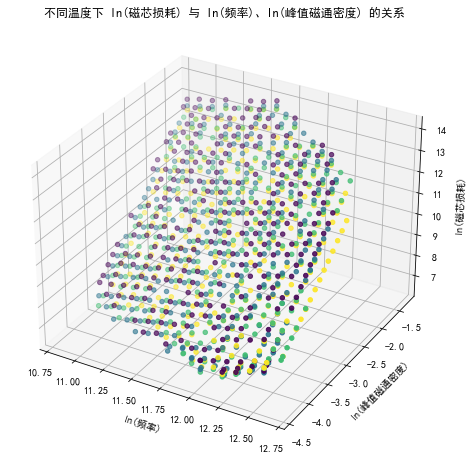

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False


# 绘制磁芯损耗与频率、峰值磁通密度的关系
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.log(data1['频率']), np.log(data1['峰值磁通密度']), np.log(data1['磁芯损耗']), c=data1['温度'], cmap='viridis')
ax.set_xlabel('ln(频率)')
ax.set_ylabel('ln(峰值磁通密度)')
ax.set_zlabel('ln(磁芯损耗)')
ax.set_title('不同温度下 ln(磁芯损耗) 与 ln(频率)、ln(峰值磁通密度) 的关系')
plt.show()


In [13]:

# 第一步：拟合所有数据，求解 alpha 和 beta
# 定义线性回归模型：ln(P) = ln(k) + alpha * ln(f) + beta * ln(Bm)
def linear_model(X, ln_k, alpha, beta):
    ln_f, ln_Bm = X
    return ln_k + alpha * ln_f + beta * ln_Bm

# 准备数据
ln_P = np.log(data1['磁芯损耗'])
ln_f = np.log(data1['频率'])
ln_Bm = np.log(data1['峰值磁通密度'])
X = np.vstack((ln_f, ln_Bm))

# 全局拟合，初始猜测值 [ln(k), alpha, beta]
popt, pcov = curve_fit(linear_model, X, ln_P, p0=[-10, 1.5, 2.5])

ln_k_global, alpha, beta = popt
k_global = np.exp(ln_k_global)

print("\n拟合得到的全局参数：")
print(f"ln(k_global) = {ln_k_global:.4f}")
print(f"k_global = {k_global:.4e}")
print(f"alpha = {alpha:.4f}")
print(f"beta = {beta:.4f}")


拟合得到的全局参数：
ln(k_global) = -1.6508
k_global = 1.9189e-01
alpha = 1.6059
beta = 2.5066


In [14]:
# 第二步：在每个温度下，计算 ln(k_i)
temperatures_unique = data1['温度'].unique()
ln_k_list = []

for T in temperatures_unique:
    data_T = data1[data1['温度'] == T]
    ln_P_T = np.log(data_T['磁芯损耗'])
    ln_f_T = np.log(data_T['频率'])
    ln_Bm_T = np.log(data_T['峰值磁通密度'])
    X_T = np.vstack((ln_f_T, ln_Bm_T))

    # 固定 alpha 和 beta，只拟合 ln(k_i)
    def linear_model_k(X, ln_k):
        ln_f, ln_Bm = X
        return ln_k + alpha * ln_f + beta * ln_Bm

    popt_T, _ = curve_fit(linear_model_k, X_T, ln_P_T, p0=[ln_k_global])
    ln_k_T = popt_T[0]
    ln_k_list.append({'温度': T, 'ln_k': ln_k_T})

    print(f"\n温度 {T}℃ 下的 ln(k_i)：{ln_k_T:.4f}")


温度 25℃ 下的 ln(k_i)：-1.1937

温度 50℃ 下的 ln(k_i)：-1.6184

温度 70℃ 下的 ln(k_i)：-1.8278

温度 90℃ 下的 ln(k_i)：-1.9610



拟合得到的温度修正参数：
ln(k0) = -0.9561
k0 = 3.8440e-01
gamma = -0.0118


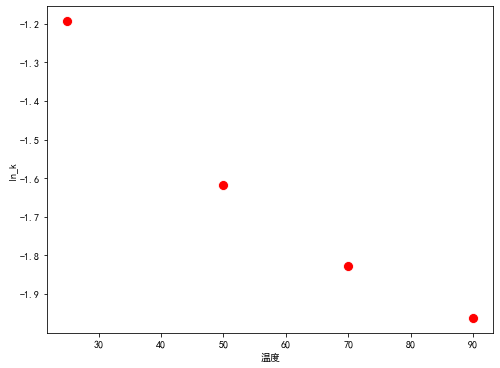

In [15]:
# 将 ln(k_i) 与温度整理为 DataFrame
ln_k_df = pd.DataFrame(ln_k_list)

# 绘制 ln(k_i) 与温度的关系图
plt.figure(figsize=(8, 6))
sns.scatterplot(x='温度', y='ln_k', data=ln_k_df, s=100, color='red')
# 拟合 ln(k_i) 与温度的关系，假设 ln(k) = ln(k0) + gamma * T
def ln_k_func(T, ln_k0, gamma):
    return ln_k0 + gamma * T

popt_k, _ = curve_fit(ln_k_func, ln_k_df['温度'], ln_k_df['ln_k'])
ln_k0, gamma = popt_k
k0 = np.exp(ln_k0)

print(f"\n拟合得到的温度修正参数：")
print(f"ln(k0) = {ln_k0:.4f}")
print(f"k0 = {k0:.4e}")
print(f"gamma = {gamma:.4f}")


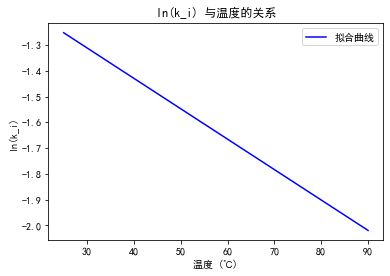

In [16]:
# 绘制拟合曲线
T_fit = np.linspace(temperatures_unique.min(), temperatures_unique.max(), 100)
ln_k_fit = ln_k_func(T_fit, ln_k0, gamma)
plt.plot(T_fit, ln_k_fit, label='拟合曲线', color='blue')
plt.xlabel('温度 (℃)')
plt.ylabel('ln(k_i)')
plt.title('ln(k_i) 与温度的关系')
plt.legend()
plt.show()

In [17]:
# 第三步：建立修正后的斯坦麦茨方程，并进行预测
# 原始斯坦麦茨方程的预测（不考虑温度修正）
data1['P_pred_SE'] = k_global * data1['频率']**alpha * data1['峰值磁通密度']**beta

# 修正后的斯坦麦茨方程的预测（考虑温度修正）
# 计算 k(T) = k0 * exp(gamma * T)
data1['k_T'] = k0 * np.exp(gamma * data1['温度'])
data1['P_pred_Mod'] = data1['k_T'] * data1['频率']**alpha * data1['峰值磁通密度']**beta

# 计算误差
data1['误差_SE'] = np.abs(data1['磁芯损耗'] - data1['P_pred_SE']) / data1['磁芯损耗'] * 100
data1['误差_Mod'] = np.abs(data1['磁芯损耗'] - data1['P_pred_Mod']) / data1['磁芯损耗'] * 100

print("\n预测结果样本：")
data1[['温度', '频率', '峰值磁通密度', '磁芯损耗', 'P_pred_SE', 'P_pred_Mod', '误差_SE', '误差_Mod']].head()



预测结果样本：


,温度,频率,峰值磁通密度,磁芯损耗,P_pred_SE,P_pred_Mod,误差_SE,误差_Mod
0,25,50030,0.028849,1997.955250,932.903368,1390.883960,53.307094,30.384629
1,25,50020,0.031419,2427.749830,1155.091571,1722.148718,52.421310,29.063996
2,25,50020,0.035535,3332.725760,1572.588984,2344.603815,52.813730,29.649063
3,25,50020,0.040015,4502.908007,2117.835014,3157.521834,52.967393,29.878163
4,25,50030,0.045028,6063.023248,2847.734234,4245.742922,53.031118,29.973171


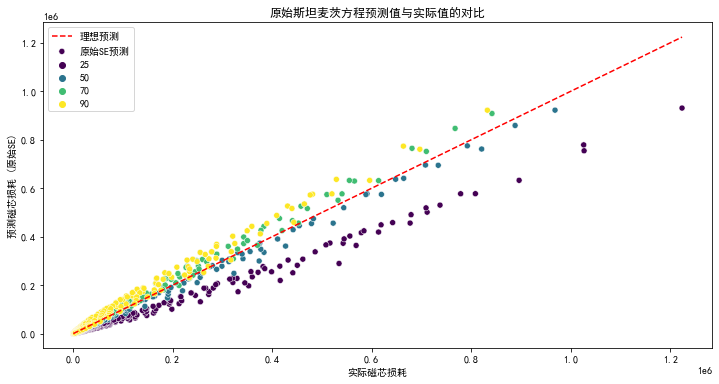

In [18]:
# 绘制预测值与实际值的对比图
plt.figure(figsize=(12, 6))
sns.scatterplot(x='磁芯损耗', y='P_pred_SE', hue='温度', data=data1, palette='viridis', label='原始SE预测')
sns.lineplot(x='磁芯损耗', y='磁芯损耗', data=data1, color='red', label='理想预测', linestyle='--')
plt.xlabel('实际磁芯损耗')
plt.ylabel('预测磁芯损耗 (原始SE)')
plt.title('原始斯坦麦茨方程预测值与实际值的对比')
plt.legend()
plt.show()

此图展示了原始斯坦麦茨方程（SE）预测的磁芯损耗值与实际测量的磁芯损耗值之间的对比。数据点按温度颜色编码，红色虚线表示理想情况下的预测结果（即预测值与实际值完全一致）。

从图中可以看出，原始斯坦麦茨方程的预测值与实际值有较大的偏差，特别是在高温度下，预测的磁芯损耗往往低于实际测量值。这表明原始方程在没有考虑温度的情况下，对磁芯损耗的预测不够精确。

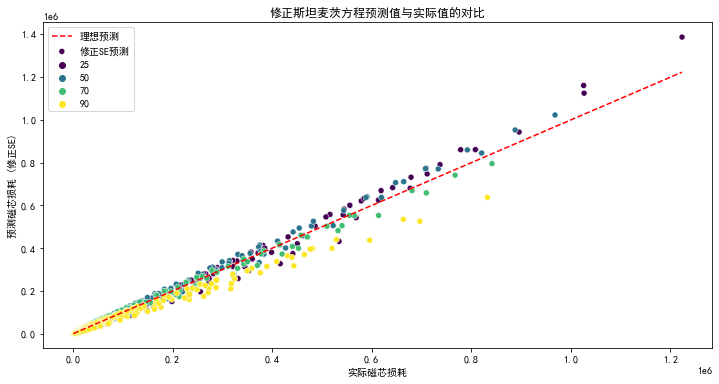

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='磁芯损耗', y='P_pred_Mod', hue='温度', data=data1, palette='viridis', label='修正SE预测')
sns.lineplot(x='磁芯损耗', y='磁芯损耗', data=data1, color='red', label='理想预测', linestyle='--')
plt.xlabel('实际磁芯损耗')
plt.ylabel('预测磁芯损耗 (修正SE)')
plt.title('修正斯坦麦茨方程预测值与实际值的对比')
plt.legend()
plt.show()

此图展示了修正斯坦麦茨方程（考虑温度因素后）的预测值与实际测量值的对比。与前一个图类似，数据点按温度进行颜色编码，红色虚线代表理想预测情况。

修正方程的预测结果与实际值更为接近，特别是在高温度条件下，预测值的准确性显著提高。这表明引入温度修正后，模型能够更好地适应不同温度下的磁芯损耗预测，改进了原始模型的预测性能。

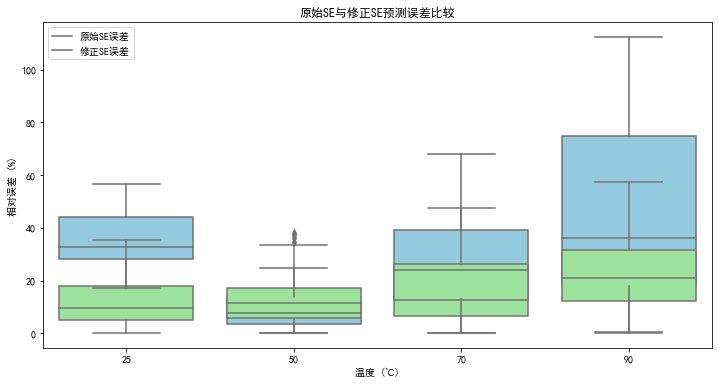

In [20]:
# 绘制误差比较图
plt.figure(figsize=(12, 6))
sns.boxplot(x='温度', y='误差_SE', data=data1, color='skyblue')
sns.boxplot(x='温度', y='误差_Mod', data=data1, color='lightgreen')
plt.xlabel('温度 (℃)')
plt.ylabel('相对误差 (%)')
plt.title('原始SE与修正SE预测误差比较')
plt.legend(['原始SE误差', '修正SE误差'])
plt.show()

箱线图展示了原始斯坦麦茨方程与修正方程在不同温度下的预测误差分布。图中显示了两种模型在各个温度下的相对误差，误差越小表示预测越精确。

从箱线图可以看出，修正后的斯坦麦茨方程在各温度下的误差都较原始方程小，尤其是在高温度下，修正后的误差显著低于原始方程。修正模型的误差分布更加集中，说明其预测更为稳定和准确。


平均相对误差：
原始斯坦麦茨方程：29.63%
修正斯坦麦茨方程：16.03%


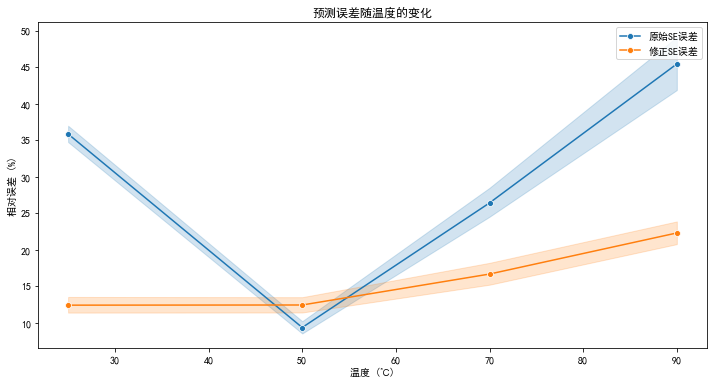

In [21]:


# 计算平均误差
mean_error_SE = data1['误差_SE'].mean()
mean_error_Mod = data1['误差_Mod'].mean()

print(f"\n平均相对误差：")
print(f"原始斯坦麦茨方程：{mean_error_SE:.2f}%")
print(f"修正斯坦麦茨方程：{mean_error_Mod:.2f}%")

# 绘制误差随温度的变化趋势
plt.figure(figsize=(12, 6))
sns.lineplot(x='温度', y='误差_SE', data=data1, marker='o', label='原始SE误差')
sns.lineplot(x='温度', y='误差_Mod', data=data1, marker='o', label='修正SE误差')
plt.xlabel('温度 (℃)')
plt.ylabel('相对误差 (%)')
plt.title('预测误差随温度的变化')
plt.legend()
plt.show()

此图展示了原始斯坦麦茨方程与修正方程的预测误差随温度变化的趋势。两条曲线分别表示两种模型的相对误差。

从图中可以明显看到，随着温度的升高，原始斯坦麦茨方程的误差逐渐增大，而修正后的方程能够保持较低且相对稳定的误差。这说明引入温度修正后，模型能够适应更广泛的温度范围，并显著减少高温条件下的预测误差。

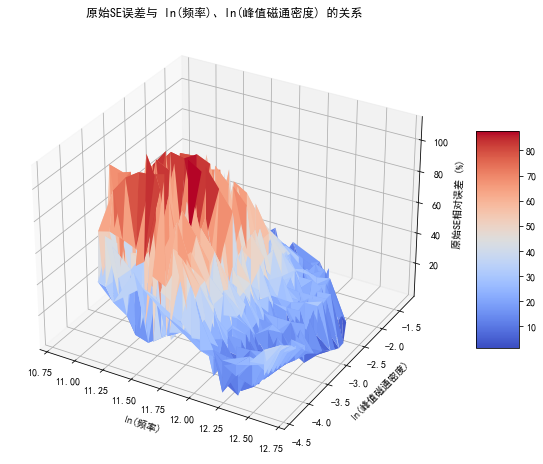

In [22]:

# 绘制 3D 图，展示误差与频率、峰值磁通密度的关系
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(np.log(data1['频率']), np.log(data1['峰值磁通密度']), data1['误差_SE'], cmap=cm.coolwarm, linewidth=0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('ln(频率)')
ax.set_ylabel('ln(峰值磁通密度)')
ax.set_zlabel('原始SE相对误差 (%)')
ax.set_title('原始SE误差与 ln(频率)、ln(峰值磁通密度) 的关系')
plt.show()

X轴（ln(频率)）和Y轴（ln(峰值磁通密度)）：

- 频率和峰值磁通密度是影响磁芯损耗的重要参数。
- 图中展示了磁芯损耗预测误差在频率和峰值磁通密度上的分布，颜色从蓝色到红色，表示误差的大小变化。蓝色代表误差较小的区域，红色代表误差较大的区域。

误差分布：

- 在低频率和较低的峰值磁通密度条件下，图中误差较小，主要呈现蓝色。
- 当频率和峰值磁通密度升高时，误差显著增大，逐渐呈现红色，尤其在高频率和高峰值磁通密度条件下，误差达到顶峰。

结论：原始斯坦麦茨方程在高频率和高峰值磁通密度下的预测误差较大，说明该模型在这些条件下的适用性较差，可能因为未考虑温度等关键因素。

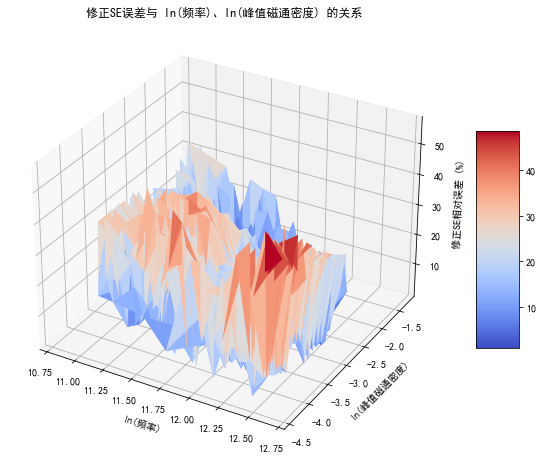

In [23]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(np.log(data1['频率']), np.log(data1['峰值磁通密度']), data1['误差_Mod'], cmap=cm.coolwarm, linewidth=0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('ln(频率)')
ax.set_ylabel('ln(峰值磁通密度)')
ax.set_zlabel('修正SE相对误差 (%)')
ax.set_title('修正SE误差与 ln(频率)、ln(峰值磁通密度) 的关系')
plt.show()


X轴（ln(频率)）和Y轴（ln(峰值磁通密度)）：

- 与图1相同，X轴代表频率，Y轴代表峰值磁通密度，颜色仍然表示误差大小。

误差分布：

- 在低频率和较低的峰值磁通密度条件下，误差仍然较小，主要呈现蓝色。
- 然而，与原始方程相比，修正方程在高频率和高峰值磁通密度下的误差显著减小，整体误差分布更加均匀。高误差的红色区域明显减少，这意味着修正后的模型在高频率、高磁通密度下也能保持相对较低的误差。

结论：修正斯坦麦茨方程有效降低了原始模型在高频率和高磁通密度条件下的预测误差，展示了其更强的适应性和更广泛的适用范围。

In [24]:
data1.to_csv('Q2_data_resu.csv',index=None)